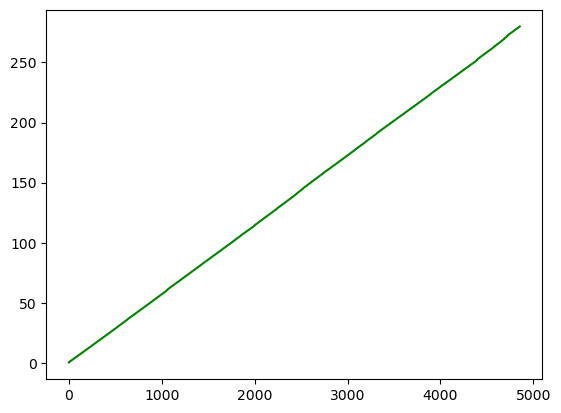

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 读取 init_pose.txt 文件
data1 = np.loadtxt(r'D:\南方\南科\weld project\soft_finger\weld_planning_2\weld_planning\data\camera1\2024-12-26-17-42.txt')
data2 = np.loadtxt(r'D:\南方\南科\weld project\soft_finger\weld_planning_2\weld_planning\data\camera1\2024-12-26-17-48.txt')
plt.plot(data2[:, 0], 'g-')



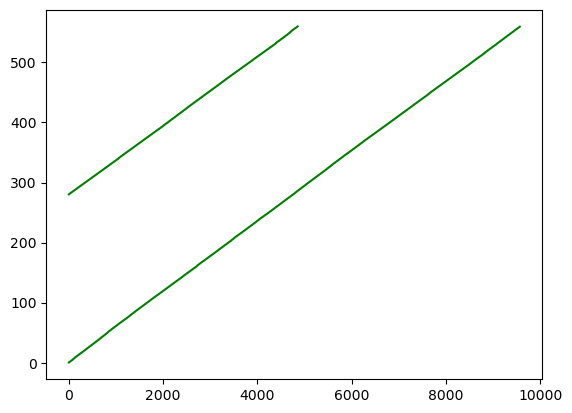

In [11]:
data2[:, 0] = data2[:, 0] + data1[-1][0]
plt.plot(data2[:, 0], 'g-')
data3 = np.loadtxt(r'D:\南方\南科\weld project\soft_finger\weld_planning_2\weld_planning\data\camera1\2024-12-26-17-57.txt')
plt.plot(data3[:, 0], 'g-')


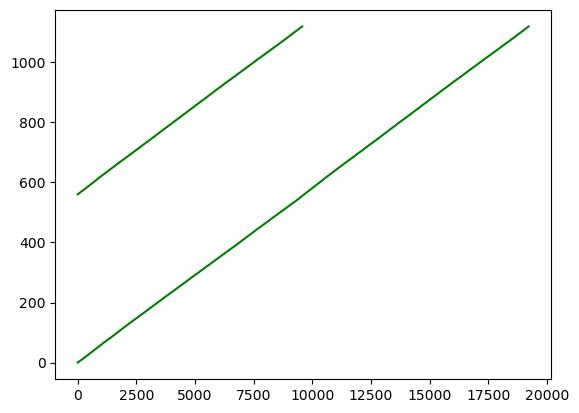

In [12]:
data3[:, 0] = data3[:, 0] + data2[-1][0]
plt.plot(data3[:, 0], 'g-')
data = np.concatenate((data1, data2, data3), axis=0)
plt.plot(data[:, 0], 'g-')

In [33]:
timestamp = data[:, 0]
force_vecs = data[:, 1 : 7]
pos_vecs = data[:, 7 : 13]
dirname = './data/camera1'
np.savetxt(dirname + '/' + 'timestamp.txt', timestamp)
np.save(dirname + '/' + 'timestamp', timestamp)

np.savetxt(dirname + '/' + 'force_vecs.txt', force_vecs)
np.save(dirname + '/' + 'force_vecs', force_vecs)

np.savetxt(dirname + '/' + 'pos_vecs.txt', pos_vecs)
np.save(dirname + '/' + 'pos_vecs', pos_vecs)

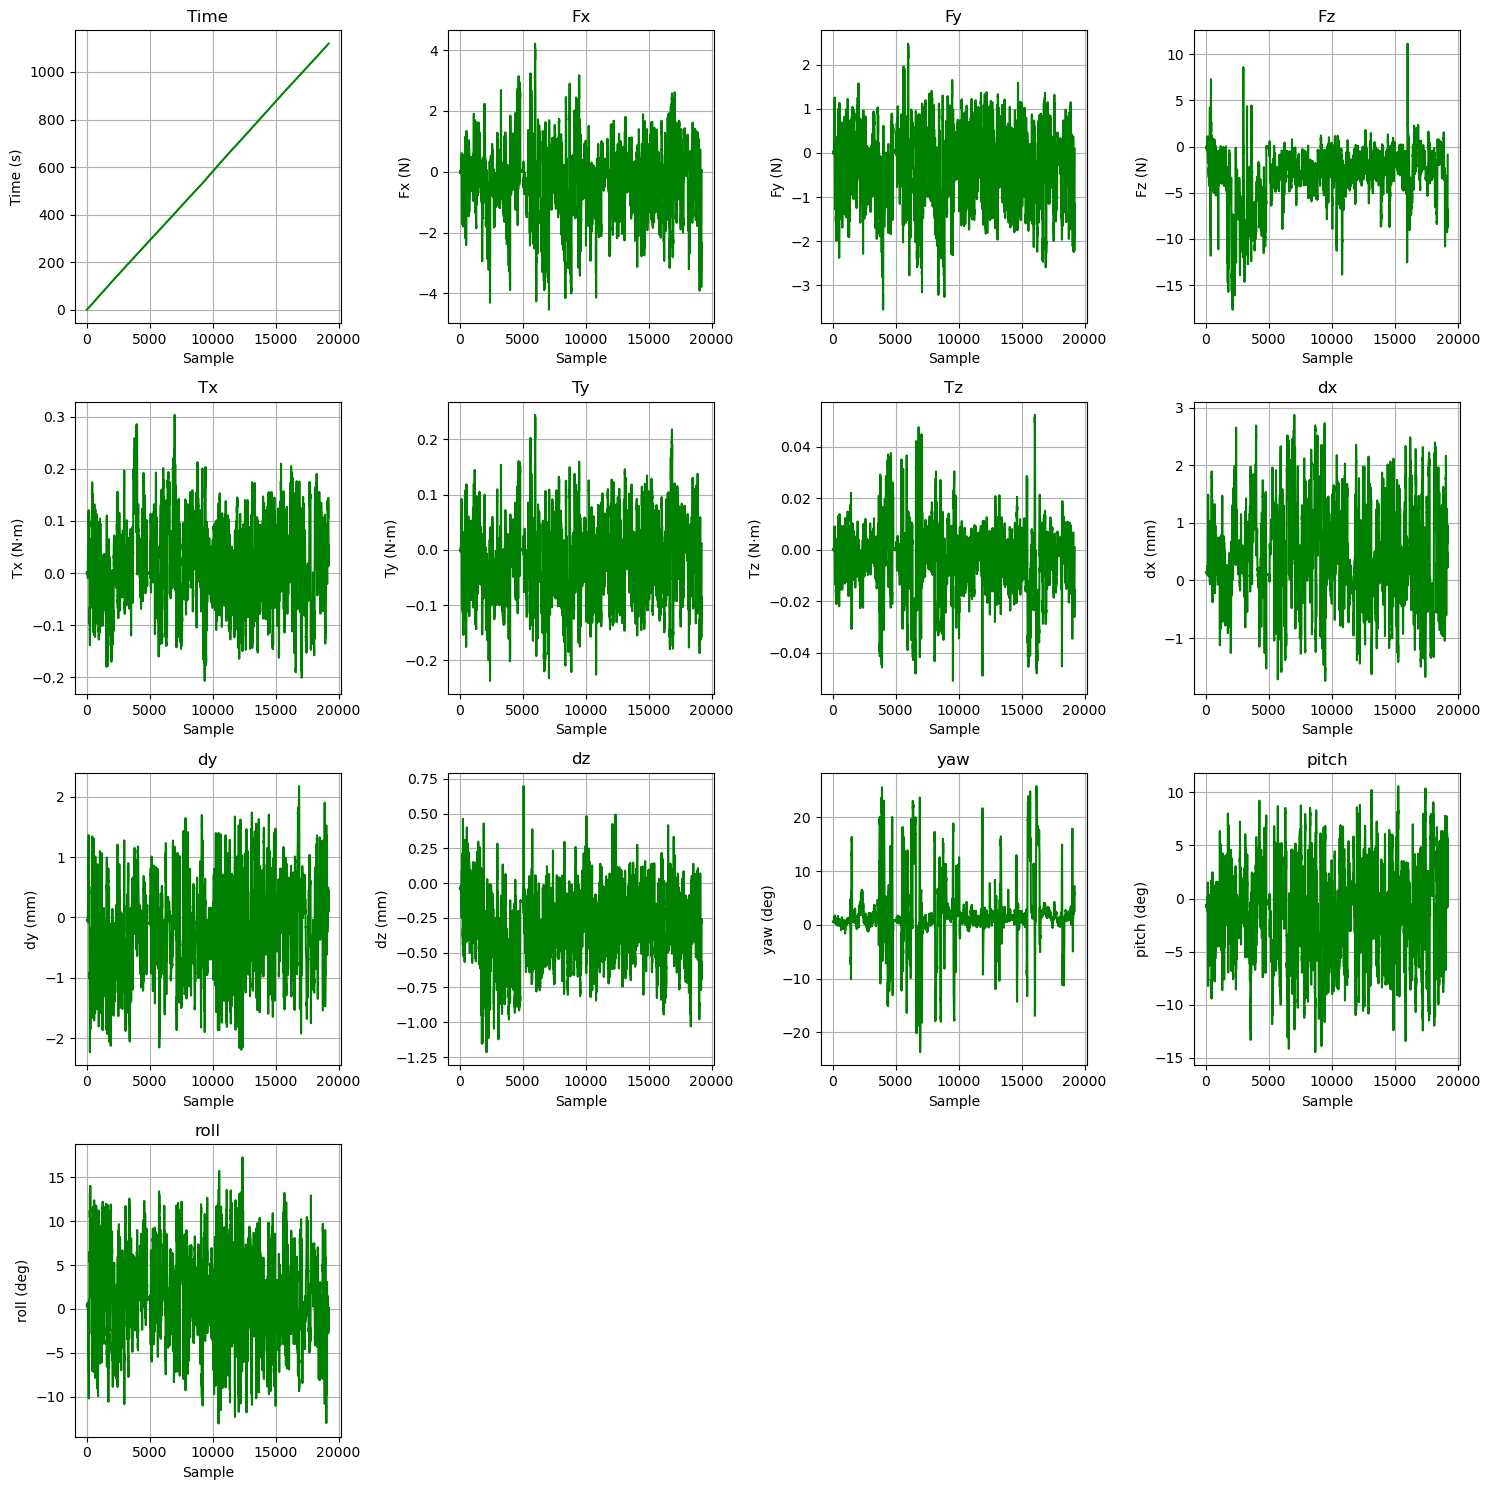

In [31]:
import matplotlib.pyplot as plt

# 定义标签和单位
labels = ['Time', 
          'Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz',
          'dx', 'dy', 'dz',  'yaw', 'pitch', 'roll']
units = ['s',
         'N', 'N', 'N', 'N·m', 'N·m', 'N·m', 
         'mm', 'mm', 'mm', 'deg', 'deg', 'deg']

# # 创建13个图
# for i in range(0, 13):
#     plt.figure(i)
#     plt.plot(data[:, i], 'g-')
#     plt.title(f'{labels[i]}')
#     plt.xlabel('Sample')
#     plt.ylabel(f'{labels[i]} ({units[i]})')
    # plt.grid(True)

# 或者在一个窗口中显示所有图:

rows = 4
cols = 4
plt.figure(figsize=(15, 15))

for i in range(0, 13):
    plt.subplot(rows, cols, i+1)
    plt.plot(data[:, i], 'g-')
    plt.title(f'{labels[i]}')
    plt.xlabel('Sample')
    plt.ylabel(f'{labels[i]} ({units[i]})')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [26]:

data = [d for d in data if abs(d[9]) < 5]
data = np.array(data)
print(data.shape)

(19208, 13)


In [30]:
new_data = []
for d in data:
    if abs(d[10]) > 30:
        d[10] += 360
    new_data.append(d)
data = np.array(new_data)

In [32]:
mask = abs(data[:,10]) > 30
print(mask.shape)



(19208,)


In [15]:
import os
dirname = './data/camera1'
if not os.path.isdir(dirname):
    os.makedirs(dirname)

file_name ='camera1.txt'

# print(data_list)
# np.savetxt(file_name, data_list)
# np.savetxt(dirname + '/' + file_name, data)
# np.save(dirname + '/' + 'camera1', data)

for i in range(1, 13):
    print(f"列 {i}:")
    print(f"最大值: {np.max(data[:, i])}, 位置: {np.argmax(data[:, i])}")
    print(f"最小值: {np.min(data[:, i])}, 位置: {np.argmin(data[:, i])}")
    print()


列 1:
最大值: 4.211149600000001, 位置: 5976
最小值: -4.5328304, 位置: 7080

列 2:
最大值: 2.477461, 位置: 5976
最小值: -3.550239, 位置: 3991

列 3:
最大值: 11.1455988, 位置: 16031
最小值: -17.6500212, 位置: 2118

列 4:
最大值: 0.30336172, 位置: 6979
最小值: -0.20705427999999998, 位置: 9367

列 5:
最大值: 0.24418272, 位置: 5977
最小值: -0.23734528, 位置: 2395

列 6:
最大值: 0.052389399999999996, 位置: 16057
最小值: -0.0509266, 位置: 9539

列 7:
最大值: 130.89726103159026, 位置: 10208
最小值: -34.245334987636745, 位置: 1209

列 8:
最大值: 36.681496804512065, 位置: 1209
最小值: -7.302505199993817, 位置: 10208

列 9:
最大值: 259.7266819410995, 位置: 10208
最小值: -11.138889392811762, 位置: 3381

列 10:
最大值: 21.17681537175477, 位置: 3886
最小值: -338.75974071183384, 位置: 3889

列 11:
最大值: 69.70692882104464, 位置: 17014
最小值: -14.45204852009823, 位置: 8692

列 12:
最大值: 104.71639737368253, 位置: 17014
最小值: -92.66432391846722, 位置: 16387

